In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [5]:
df=pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True)

In [6]:
print(df)

      age     bmi  children      charges  sex_male  smoker_yes  \
0      19  27.900         0  16884.92400         0           1   
1      18  33.770         1   1725.55230         1           0   
2      28  33.000         3   4449.46200         1           0   
3      33  22.705         0  21984.47061         1           0   
4      32  28.880         0   3866.85520         1           0   
...   ...     ...       ...          ...       ...         ...   
1333   50  30.970         3  10600.54830         1           0   
1334   18  31.920         0   2205.98080         0           0   
1335   18  36.850         0   1629.83350         0           0   
1336   21  25.800         0   2007.94500         0           0   
1337   61  29.070         0  29141.36030         0           1   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0                 1                 0  
2                    0  

In [7]:
X=df.drop('charges',axis=1)
y=df['charges']

In [8]:
model=LinearRegression()

In [9]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
model.fit(train_X,train_y)

LinearRegression()

In [11]:
import seaborn as sns


In [12]:
correlation_matrix=df.corr()

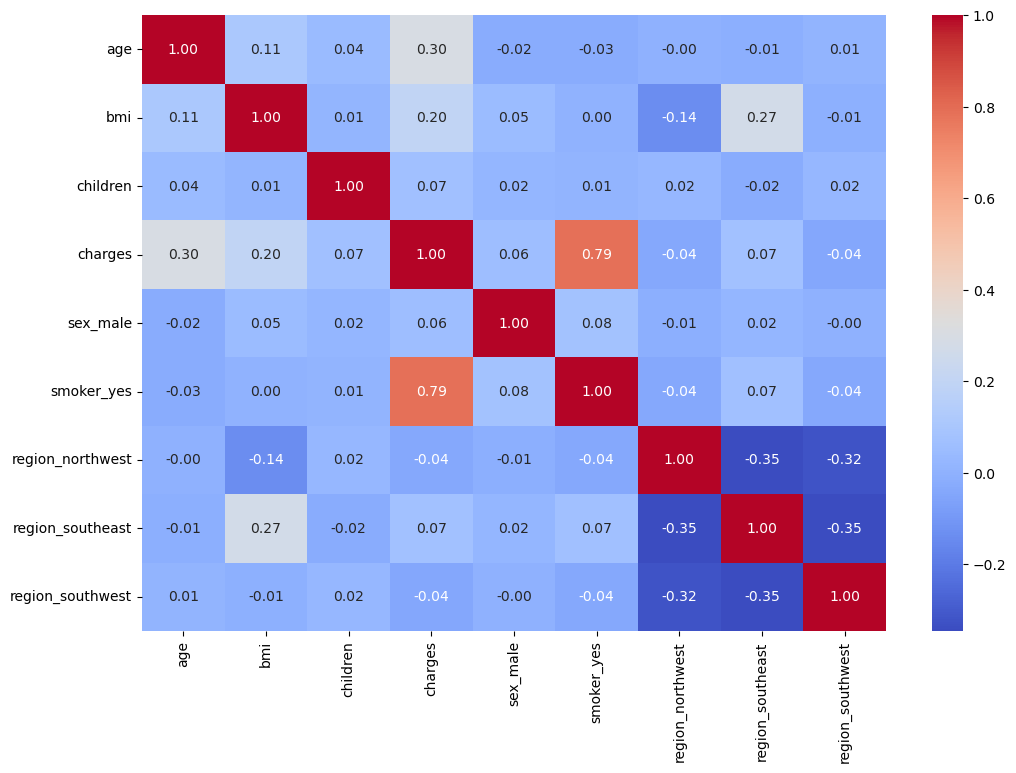

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error,r2_score

In [19]:
y_pred=model.predict(test_X)

In [21]:
mse=mean_squared_error(y_pred,test_y)

In [22]:
r2=r2_score(y_pred,test_y)

In [23]:
print(mse,r2)

33596915.851361446 0.7088351277198346


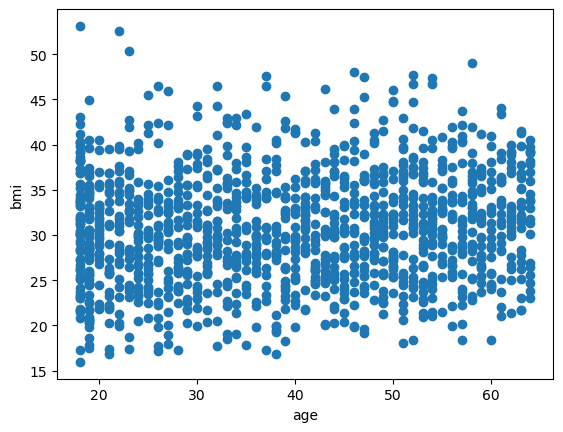

In [25]:
plt.scatter(df['age'],df['bmi'])
plt.xlabel('age')
plt.ylabel('bmi')

plt.show()

In [26]:
import pandas as pd

df=pd.read_csv('User_Data.csv')
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [28]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [30]:
X=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [59]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [60]:
y_pred=model.predict(X_test)

In [65]:
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.8625


In [66]:
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[50  2]
 [ 9 19]]


In [69]:
classifi_reports=classification_report(y_test,y_pred)
print(classifi_reports)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

